In [ ]:
# !pip install scikit-learn-extra

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('F:\WESM_data\RTD_Generation_Offers\consolidated_csv_01SUAL_G01.csv')

In [3]:
df

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,RTD,CLUZ,NLUZON,01SUAL_G01,09/25/2023 11:40:00 PM,09/25/2023 11:35:00 PM,09/25/2023 11:40:00 PM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207766,09/25/2023 11:40:00 PM,RTD,CLUZ,NLUZON,01SUAL_G01,09/25/2023 11:45:00 PM,09/25/2023 11:40:00 PM,09/25/2023 11:45:00 PM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207767,09/25/2023 11:45:00 PM,RTD,CLUZ,NLUZON,01SUAL_G01,09/25/2023 11:50:00 PM,09/25/2023 11:45:00 PM,09/25/2023 11:50:00 PM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207768,09/25/2023 11:50:00 PM,RTD,CLUZ,NLUZON,01SUAL_G01,09/25/2023 11:55:00 PM,09/25/2023 11:50:00 PM,09/25/2023 11:55:00 PM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get Maximum Capacity from a different dict?

# Clean Time-stamp
(next time)

# Drop columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207770 entries, 0 to 207769
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RUN_TIME            207770 non-null  object 
 1   MKT_TYPE            207770 non-null  object 
 2   REGION_NAME         207770 non-null  object 
 3   ZONE_NAME           207770 non-null  object 
 4   RESOURCE_NAME       207770 non-null  object 
 5   TIME_INTERVAL       207770 non-null  object 
 6   START_TIME          207770 non-null  object 
 7   END_TIME            207770 non-null  object 
 8   MP_NAME             203198 non-null  object 
 9   PRICE1              207770 non-null  float64
 10  QUANTITY1           207770 non-null  float64
 11  PRICE2              207770 non-null  float64
 12  QUANTITY2           207770 non-null  float64
 13  PRICE3              156538 non-null  float64
 14  QUANTITY3           156538 non-null  float64
 15  PRICE4              135981 non-nul

In [5]:
# # Define the columns containing price-quantity pairs and timestamps
# selected_columns = ['RUN_TIME', 'PRICE1', 'PRICE2', 'PRICE3', 'PRICE4', 'PRICE5', 'PRICE6', 'PRICE7', 'PRICE8', 'PRICE9', 'PRICE10', 'PRICE11',
#                     'QUANTITY1', 'QUANTITY2', 'QUANTITY3', 'QUANTITY4', 'QUANTITY5', 'QUANTITY6', 'QUANTITY7', 'QUANTITY8', 'QUANTITY9', 'QUANTITY10', 'QUANTITY11']

In [6]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [7]:
selected_columns

['RUN_TIME',
 'PRICE1',
 'PRICE2',
 'PRICE3',
 'PRICE4',
 'PRICE5',
 'PRICE6',
 'PRICE7',
 'PRICE8',
 'PRICE9',
 'PRICE10',
 'PRICE11',
 'QUANTITY1',
 'QUANTITY2',
 'QUANTITY3',
 'QUANTITY4',
 'QUANTITY5',
 'QUANTITY6',
 'QUANTITY7',
 'QUANTITY8',
 'QUANTITY9',
 'QUANTITY10',
 'QUANTITY11']

In [8]:
# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]
result_df

,RUN_TIME,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
0,06/26/2021,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,...,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,...,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,...,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,...,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,...,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN
207766,09/25/2023 11:40:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN
207767,09/25/2023 11:45:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN
207768,09/25/2023 11:50:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN


In [9]:
#change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

# FFill NaNs with last Price-Quantity Bid

In [10]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

## TAKES 30 SECONDS TO RUN
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0
207766,09/25/2023 11:40:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0
207767,09/25/2023 11:45:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0
207768,09/25/2023 11:50:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0


# Normalization

In [11]:
result_df.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,...,207770.00000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000
mean,-9982.411698,-9982.411698,2316.779508,2762.142137,4155.312328,4279.955689,4395.808245,4427.694484,4477.842781,4484.516733,...,435.95919,493.269000,533.512572,577.621379,596.280223,607.377567,613.690740,618.616923,621.056567,621.056567
std,778.696008,778.696008,7963.325252,8214.691674,9341.796726,9430.481023,9517.342538,9538.313994,9590.673331,9592.340360,...,143.29933,128.576812,113.663589,96.830962,87.253795,81.404479,77.698764,76.207518,76.376307,76.376307
min,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
25%,-10000.000000,-10000.000000,1764.930000,2213.620000,2213.620000,2213.620000,2213.620000,2213.620000,2213.620000,2213.620000,...,290.00000,350.000000,450.000000,550.000000,580.000000,580.000000,600.000000,647.000000,647.000000,647.000000
50%,-10000.000000,-10000.000000,4582.690000,4999.780000,5750.080000,6000.080000,6200.080000,6290.080000,6290.080000,6290.080000,...,450.00000,500.000000,550.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
75%,-10000.000000,-10000.000000,7533.080000,8320.080000,9300.080000,9475.080000,9500.080000,9520.080000,9550.080000,9550.080000,...,541.00000,620.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
max,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,647.00000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming result_df is your DataFrame
# If not, you can create it using pd.DataFrame(data)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Identify the quantity columns
quantity_columns = result_df.columns[result_df.columns.str.startswith('quantity')]

# Normalize and scale the quantity columns using MinMaxScaler
result_df.loc[:, quantity_columns] = scaler.fit_transform(result_df.loc[:, quantity_columns])

# Now, result_df has the quantity columns normalized and scaled to the range [0, 1]
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0
207766,09/25/2023 11:40:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0
207767,09/25/2023 11:45:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0
207768,09/25/2023 11:50:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0


# Clustering using K-Medoids

## clip result_df rows

In [13]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207770 entries, 0 to 207769
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   run_time    207770 non-null  object 
 1   price1      207770 non-null  float64
 2   price2      207770 non-null  float64
 3   price3      207770 non-null  float64
 4   price4      207770 non-null  float64
 5   price5      207770 non-null  float64
 6   price6      207770 non-null  float64
 7   price7      207770 non-null  float64
 8   price8      207770 non-null  float64
 9   price9      207770 non-null  float64
 10  price10     207770 non-null  float64
 11  price11     207770 non-null  float64
 12  quantity1   207770 non-null  float64
 13  quantity2   207770 non-null  float64
 14  quantity3   207770 non-null  float64
 15  quantity4   207770 non-null  float64
 16  quantity5   207770 non-null  float64
 17  quantity6   207770 non-null  float64
 18  quantity7   207770 non-null  float64
 19  qu

In [14]:
# Get the first 87194 rows
result_df_subset = result_df.head(87194)

In [16]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract 'run_time' for later use
run_time_column = result_df_subset['run_time']

# Extract numerical columns for clustering
# numerical_columns = result_df_subset.columns[1:]  # Assuming columns from 'price1' onwards are numerical

#Trying to cluster quantity only
quantity_columns = [f'quantity{i}' for i in range(1, 12)]

# Extract numerical data for clustering
data_for_clustering = result_df_subset[quantity_columns].values

# # Standardize the data (optional but often recommended for K-medoids)
# scaler = StandardScaler()
# data_for_clustering_standardized = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (you can adjust this)
n_clusters = 5

In [18]:
data_for_clustering

array([[0.        , 0.77301927, 0.96937901, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.77301927, 0.96937901, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.77301927, 0.96937901, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [19]:
%%time
# # Run K-medoids clustering
# kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
# result_df['cluster'] = kmedoids.fit_predict(data_for_clustering)

# Testing k-means
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(data_for_clustering)

C:\Users\Gaea\anaconda3\envs\textparse\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 1.73 s
Wall time: 294 ms


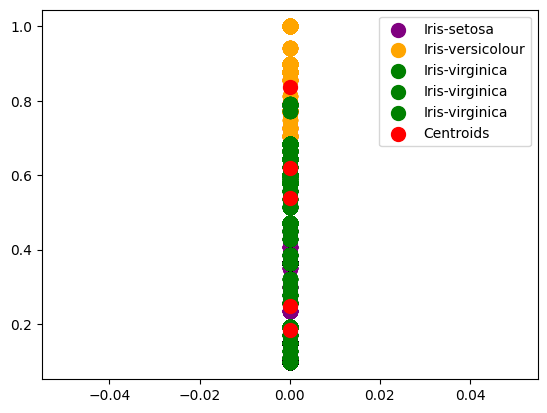

In [20]:
#Visualising the clusters
plt.scatter(data_for_clustering[y_kmeans == 0, 0], data_for_clustering[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data_for_clustering[y_kmeans == 1, 0], data_for_clustering[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data_for_clustering[y_kmeans == 2, 0], data_for_clustering[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(data_for_clustering[y_kmeans == 3, 0], data_for_clustering[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(data_for_clustering[y_kmeans == 4, 0], data_for_clustering[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [ ]:
# # Now, result_df has a new 'cluster' column indicating the assigned cluster for each row

# # You can explore the clusters or perform further analysis
# # For example, print the medoid indices for each cluster
# medoid_indices = kmedoids.medoid_indices_
# print("Medoid indices for each cluster:", medoid_indices)

# # Optionally, you can visualize the clusters using scatter plots
# # Assuming you want to visualize based on 'price1' and 'quantity1'
# plt.scatter(result_df['price1'], result_df['quantity1'], c=result_df['cluster'], cmap='viridis', alpha=0.5)
# plt.title('K-medoids Clustering')
# plt.xlabel('Price1')
# plt.ylabel('Quantity1')
# plt.show()
